# Data Description
The data used for the prediction comes from the video game FIFA. It contains all the important properties of a player. Some important attributes will be presented briefly. The players receive an "Overall Rating", which lies between 1 and 99 and reflects the overall strength of a player. Likewise, all individual attribute values for a player such as "Pace", "Passing", "Dribbling" or "Physics" etc. are given in a range of 1-99. Young players in particular still have "Potential" for improvement. This can be exhausted in the course of the game with increasing experience, so that this value shows the future maximum overall rating of a player.  
"Best Position" shows the preferred position of a player, in which he is used to best play to his strengths. 
All attributes starting with "gk" refer to goalkeeper attributes only and are not relevant for field players, even if they have values in these attributes as well. 
"Weak Foot" indicates, in a range from one to five, the strength with which a player can shoot with his weaker foot. The same scale applies to "Skill moves" which expresses whether a player can play particularly tricky. 
The attribute "Loan Player" shows whether a player is currently on loan to another club. 
"Contract Start" and "Contract End" indicate since when a player has a current contract with a club and when it ends. 

In [5]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

#load data
data = pd.read_csv("utils/fifa_data_cleaned")

# Muchos Grafikos

### Distribution of Positions 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


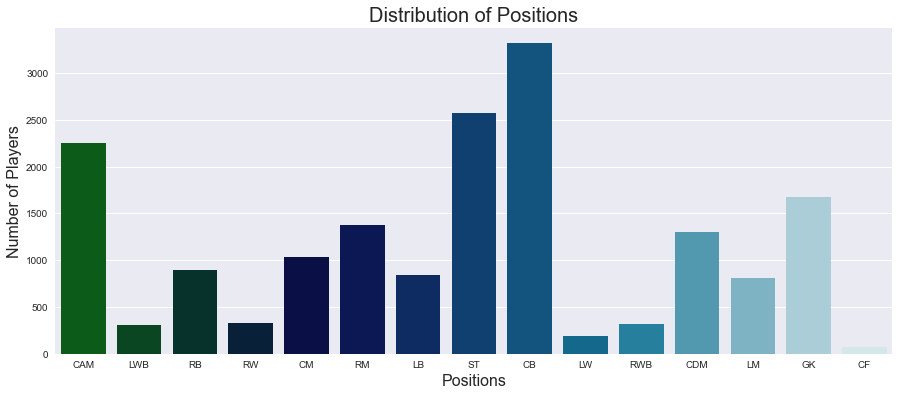

In [2]:
plt.figure(figsize = (15, 6))
plt.style.use('seaborn')
ax = sns.countplot('best_postion', data = data, palette = 'ocean')
ax.set_xlabel(xlabel = 'Positions', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Positions', fontsize = 20)
plt.show()

In [4]:
# sort the market_value 
sort = data.sort_values("market_value")
N = len(sort)
print(N/4)
print(N/2)
print(N*0.75)
print(N*0.9)

mv_25 = sort[0:4327]
mv_50 = sort[4328:8654]
mv_75 = sort[8655:12980]
mv_90 = sort[12981:15577]
mv_100 = sort[15578:17307]
top_100 = sort[17207:]

4326.75
8653.5
12980.25
15576.300000000001


### Show how many players, have which market value 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


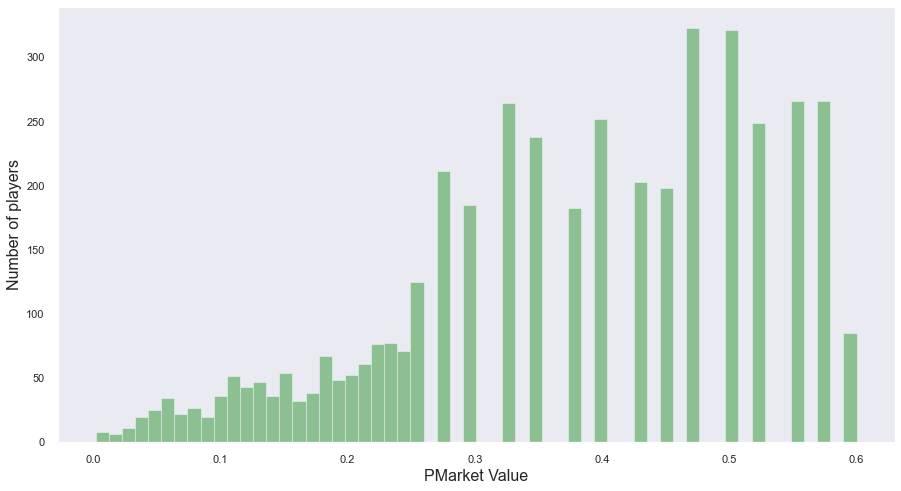

In [5]:
sns.set(style = "dark", palette = "ocean", color_codes = True)
plt.figure(figsize = (15,8))
ax = sns.distplot(mv_25.market_value/1000000, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "PMarket Value", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
plt.show()

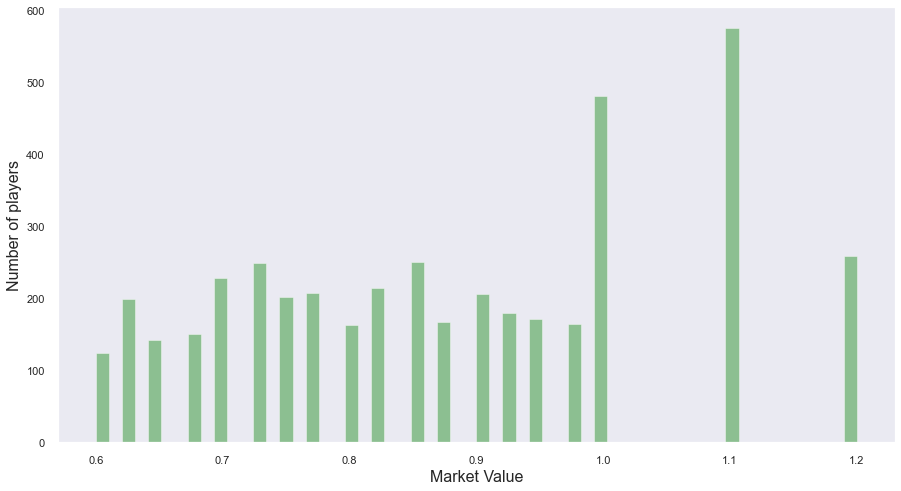

In [6]:
sns.set(style = "dark", palette = "ocean", color_codes = True)
plt.figure(figsize = (15,8))
ax = sns.distplot(mv_50.market_value/1000000, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Market Value", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
plt.show()

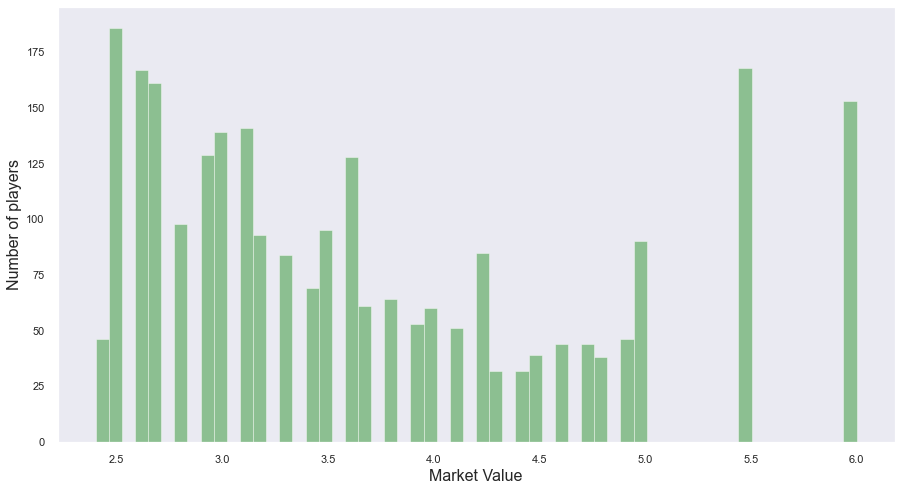

In [7]:
sns.set(style = "dark", palette = "ocean", color_codes = True)
plt.figure(figsize = (15,8))
ax = sns.distplot(mv_90.market_value/1000000, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Market Value", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
plt.show()

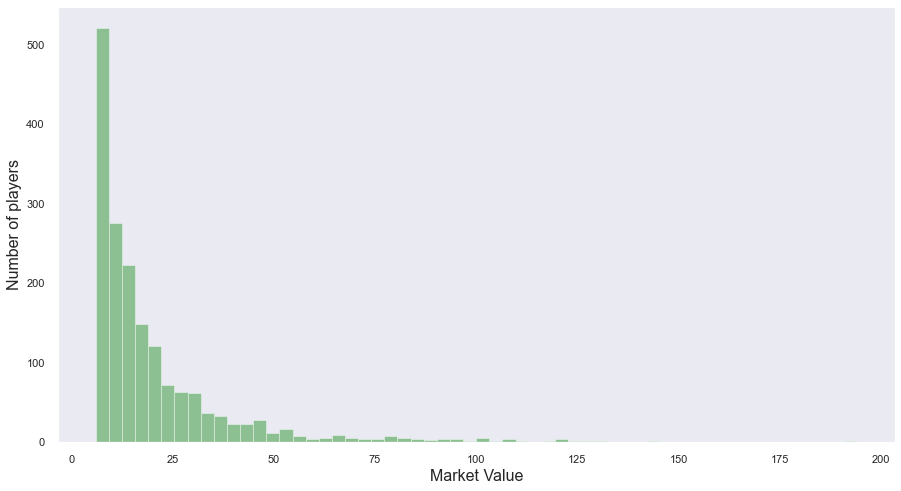

In [8]:
sns.set(style = "dark", palette = "ocean", color_codes = True)
plt.figure(figsize = (15,8))
ax = sns.distplot(mv_100.market_value/1000000, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Market Value", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
plt.show()

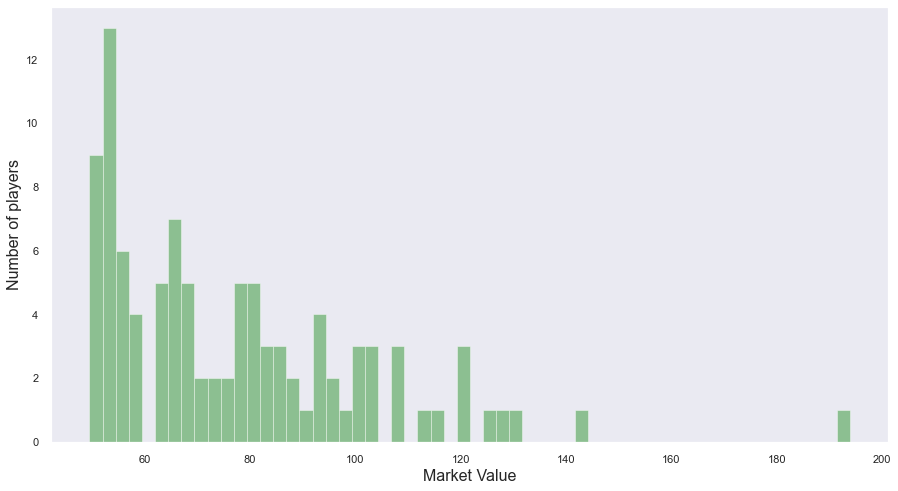

In [9]:
sns.set(style = "dark", palette = "ocean", color_codes = True)
plt.figure(figsize = (15,8))
ax = sns.distplot(top_100.market_value/1000000, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Market Value", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
plt.show()

### Histogram of players age 

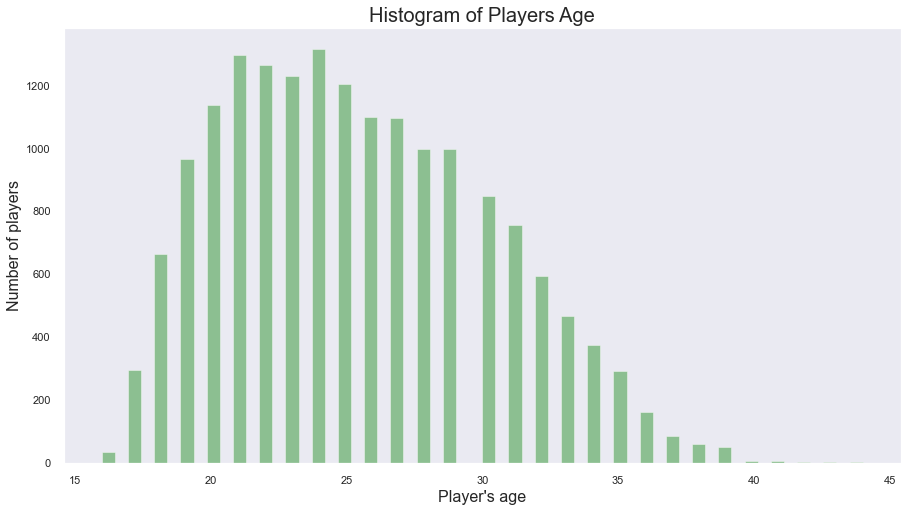

In [10]:
sns.set(style = "dark", palette = "ocean", color_codes = True)
x = data.age
plt.figure(figsize = (15,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player's age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of Players Age', fontsize = 20)
plt.show()

### Histogram of players overall ratin 

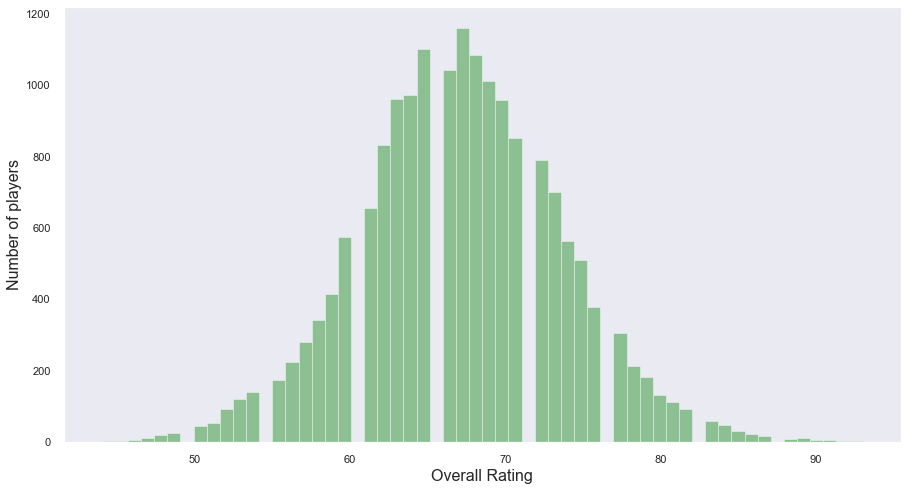

In [11]:
sns.set(style = "dark", palette = "ocean", color_codes = True)
x = data.overall_rating
plt.figure(figsize = (15,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Overall Rating", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = '', fontsize = 20)
plt.show()

### Avg. rating of players by age 

<function matplotlib.pyplot.show(close=None, block=None)>

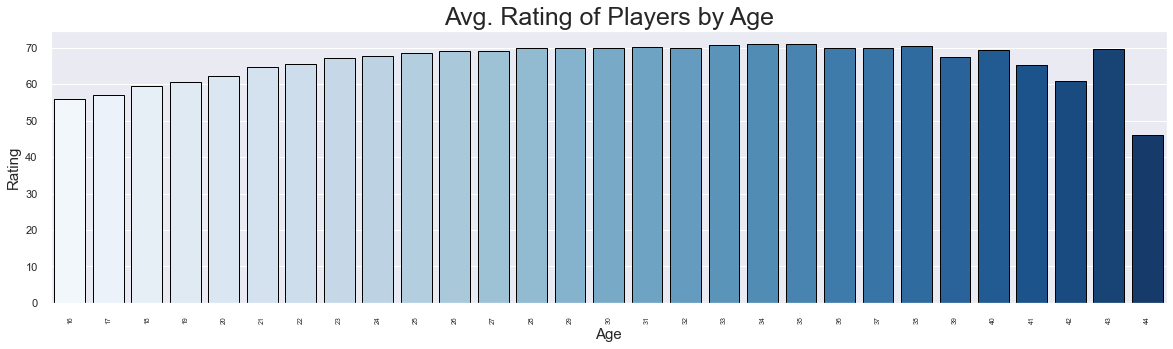

In [12]:
sns.set_style('darkgrid')
avg_nation = data.groupby('age').mean().reset_index().sort_values(by='overall_rating', ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x=avg_nation['age'] , y=avg_nation['overall_rating'], palette='Blues', edgecolor='Black')
plt.xticks(rotation='vertical', size=7)
plt.title('Avg. Rating of Players by Age', size=25)
plt.xlabel('Age', size=15)
plt.ylabel('Rating', size=15)
plt.show

### Market value by overall rating of the players 

Text(0.5, 1.0, 'Value by Rating')

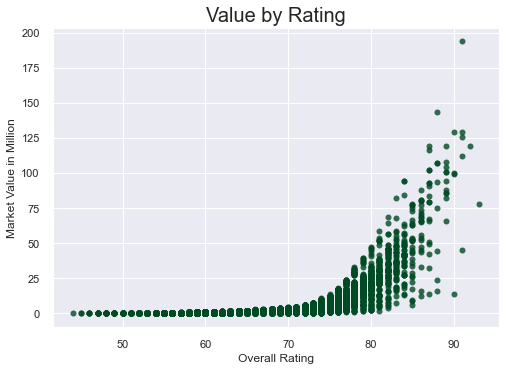

In [13]:
value = data.market_value
ax = sns.regplot(x = 'overall_rating', y = value / 1000000 , fit_reg = False, data = data)
plt.xlabel("Overall Rating")
plt.ylabel("Market Value in Million")
ax.set_title(label='Value by Rating', fontsize=20)

### Comparison of overall scores and age with respect to loan players or not 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


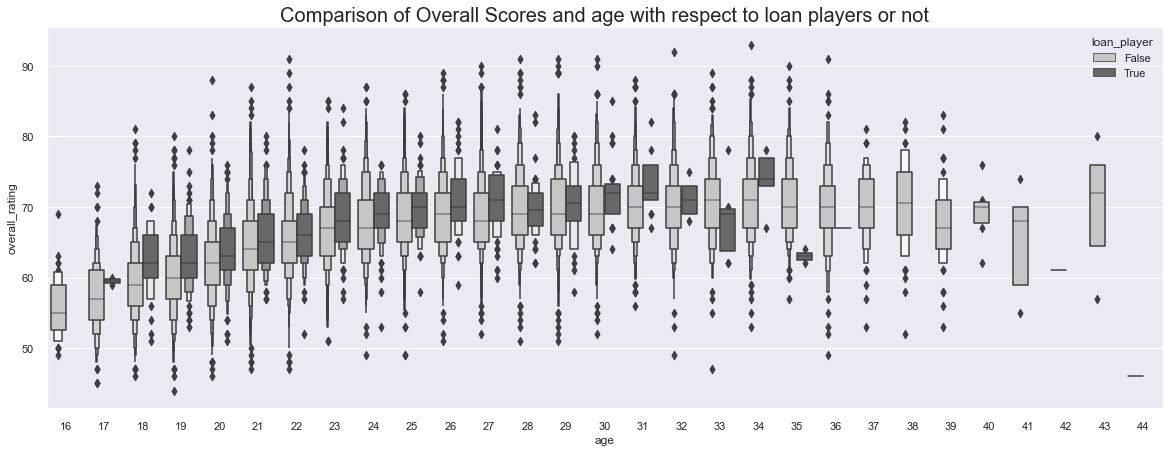

In [14]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(data['age'], data['overall_rating'], hue = data['loan_player'], palette = 'Greys')
plt.title('Comparison of Overall Scores and age with respect to loan players or not', fontsize = 20)
plt.show()

### Comparing the weight with the pace of the players 

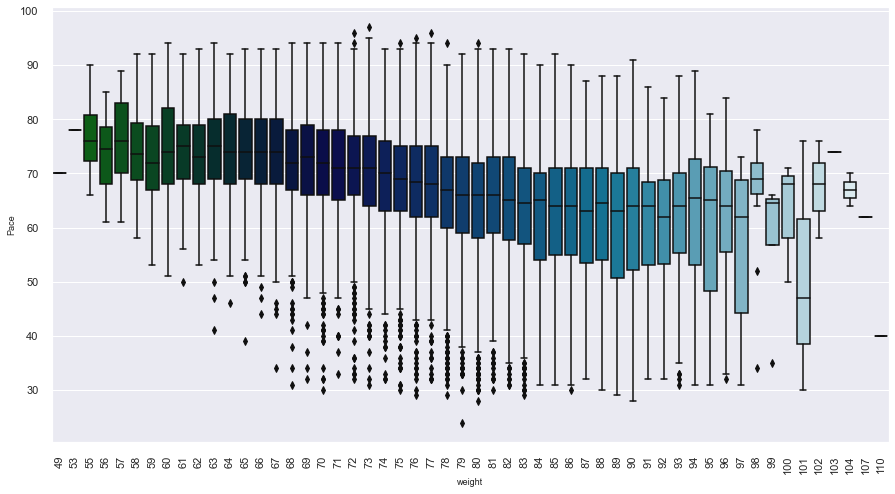

In [15]:
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data['weight'], y = data['pace'], palette = 'ocean')
ax.set_xlabel(xlabel = 'weight', fontsize = 9)
ax.set_ylabel(ylabel = 'Pace', fontsize = 9)
ax.set_title(label = '', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### Comparing height and pace of the players 

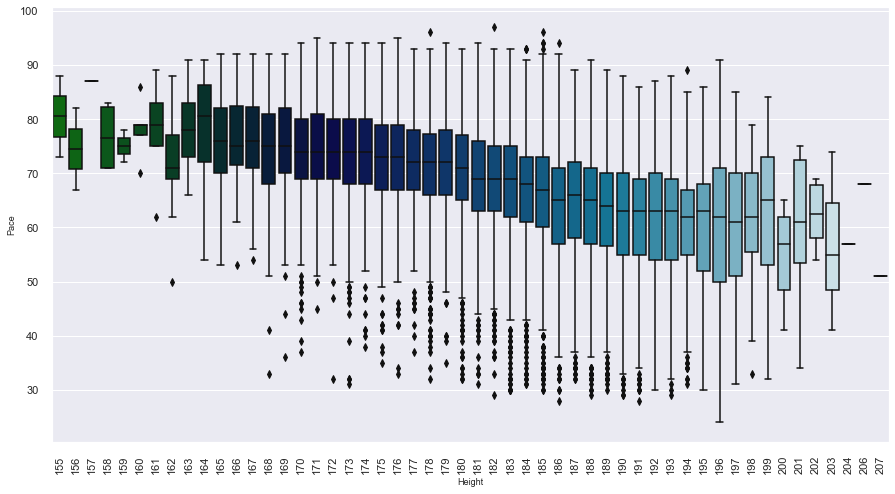

In [16]:
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data['height'], y = data['pace'], palette = 'ocean')
ax.set_xlabel(xlabel = 'Height', fontsize = 9)
ax.set_ylabel(ylabel = 'Pace', fontsize = 9)
ax.set_title(label = '', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### Distribution of pyhiscal attributes

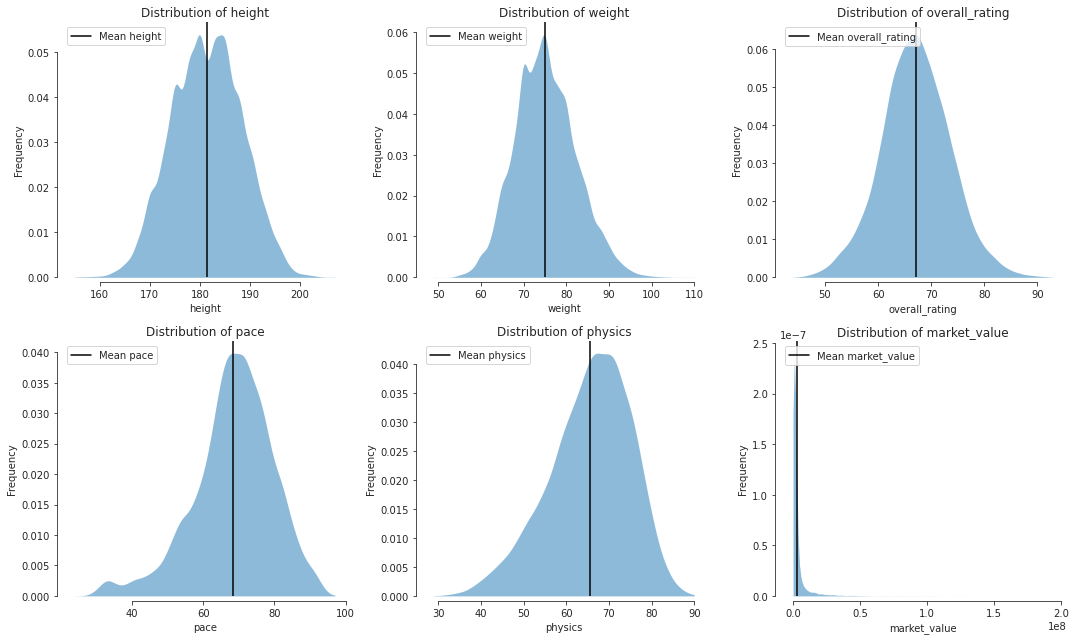

In [3]:
physical_attributes = [
    "height",
    "weight",
    "overall_rating",
    "pace",
    "physics",
    "market_value"
    ]
data[physical_attributes].describe()
f = plt.figure(figsize=(20, 9))
gs = f.add_gridspec(2, 4)

with sns.axes_style("white"):
    sns.set_style("ticks")
    x = 0
    y = 0
    for attr in physical_attributes:
        ax = f.add_subplot(gs[x, y])
        # sns.histplot(data=df, x=attr, bins=25, kde=True);
        sns.kdeplot(data=data, x=attr, cut=0, fill=True, palette="crest", linewidth=0, alpha=.5);
        plt.title(f"Distribution of {attr}");
        plt.axvline(x=np.mean(data[attr]),c='black',label=f'Mean {attr}')
        plt.xlabel(attr);
        plt.ylabel("Frequency");
        plt.legend(loc="upper left")
        sns.despine(trim=True, offset=5)
        y+=1
        if (y % 3) == 0:
            y = 0
            x +=1

f.tight_layout()

### Proportion of players by skill moves

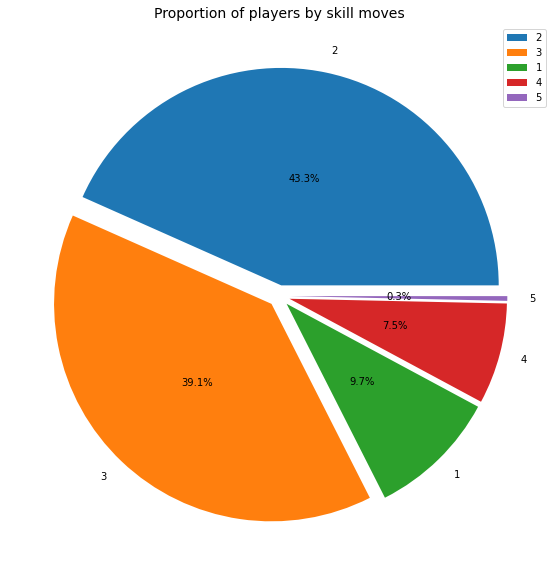

In [4]:
pie, ax = plt.subplots(figsize=[15,10])
labels = data["skill_moves"].value_counts().keys()
plt.pie(x=data["skill_moves"].value_counts(), autopct="%.1f%%", labels=labels, explode=[0.05]*5, pctdistance=0.5)
plt.legend()
plt.title("Proportion of players by skill moves", fontsize=14);

### Mean values of main FIFA attributes 

In [6]:
# mean values of main FIFA attributes

labels=np.array([
    "pace",
    "defending",
    "shooting",
    "dribbling",
    "passing",
    "physics"
    ])
stats=data[labels].mean()
#fig = px.line_polar(highest_rated, r=stats, theta=labels, line_close=True)
# fig.update_traces(fill='toself')
# fig.show()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels
      #fill='toself',
      #name='J. Oblak'
))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,)

fig.show()

### Mean Values of main FIFA attributes for players with high and low market value  

In [7]:
sort = data.sort_values("market_value")
N = len(sort)
print(N/2)
print(N*0.75)
print(N*0.9)
print(N)

mv_lower_half = sort[0:8654]
mv_upper_half = sort[8654:]
#print(np.mean(mv_upper_half["pace"]))
mv_upper_quantile = sort[12981:]
mv_upper_10_percent = sort[15577:]
mv_top_100 = sort[17207:]

8653.5
12980.25
15576.300000000001
17307


In [8]:
# mean values of main FIFA attributes for high and low paid players

labels=np.array([
    "pace",
    "defending",
    "shooting",
    "dribbling",
    "passing",
    "physics"
    ])
stats=mv_lower_half[labels].mean()
#fig = px.line_polar(highest_rated, r=stats, theta=labels, line_close=True)
# fig.update_traces(fill='toself')
# fig.show()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='Low value players'
))

stats=mv_upper_half[labels].mean()

fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='High value players'
))

fig.update_layout(
    autosize=True)
    #width=1000,
    #height=1000,)

fig.show()

### Mean Values of main FIFA attributes for players with high and low market value of different groups 

In [9]:
# mean values of main FIFA attributes for different groups of players

labels=np.array([
    "pace",
    "defending",
    "shooting",
    "dribbling",
    "passing",
    "physics"
    ])
stats=mv_lower_half[labels].mean()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='Lower 50% of players'
))

stats=mv_upper_half[labels].mean()

fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='Upper 50% of players'
))

stats=mv_upper_quantile[labels].mean()

fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='Upper 25% of players'
))

stats=mv_upper_10_percent[labels].mean()

fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='Upper 10% of players'
))

stats=mv_top_100[labels].mean()

fig.add_trace(go.Scatterpolar(
      r=stats,
      theta=labels,
      fill='toself',
      name='Top 100 players'
))

fig.update_layout(
    polar=dict(
    radialaxis=dict(visible=True,range=[0,90])),
    title='Mean Attribute Values',
    autosize=False,
    width=900,
    height=900,)

fig.show()

### Value in euro per position

In [10]:
fig = px.scatter(data,x='name',y='market_value',color='best_postion',
                 labels={'market_value': 'Value in Euro','best_postion':'Position'})
fig.update_xaxes(visible=False)
# allign title
fig.update_layout(title_text='Value in Euro per Position', title_x=0.5)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,)),
                  selector=dict(mode='markers'))

fig.show()

### Value in euro per position which are grouped 

In [11]:
# change positions

positions_list=[]

[positions_list.append(x.split(',')[0]) for x in data['best_postion'].values.tolist()]
    
data['position']= positions_list


for x in data['position']:
    if x in ['ST','CF','RW','LW']:
        data['position'].replace(to_replace=x,value='Attacker',inplace=True) 
    if x in ['LM','RM','CM','CDM','CAM']:
        data['position'].replace(to_replace=x,value='Midfielder',inplace=True)
    if x in ['LB','RB','CB', 'LWB', 'RWB']:
        data['position'].replace(to_replace=x,value='Defender',inplace=True)
    if x in ['GK']:
        data['position'].replace(to_replace=x,value='Goalkeeper',inplace=True)

fig = px.scatter(data,x='name',y='market_value',color='position',
                 labels={'market_value': 'Value in Euro','position':'Position'})
fig.update_xaxes(visible=False)
# allign title
fig.update_layout(title_text='Value in Euro per Position', title_x=0.5)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,)),
                  selector=dict(mode='markers'))

fig.show()

### Histogram of players potential scores

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Histogram of players Potential Scores')

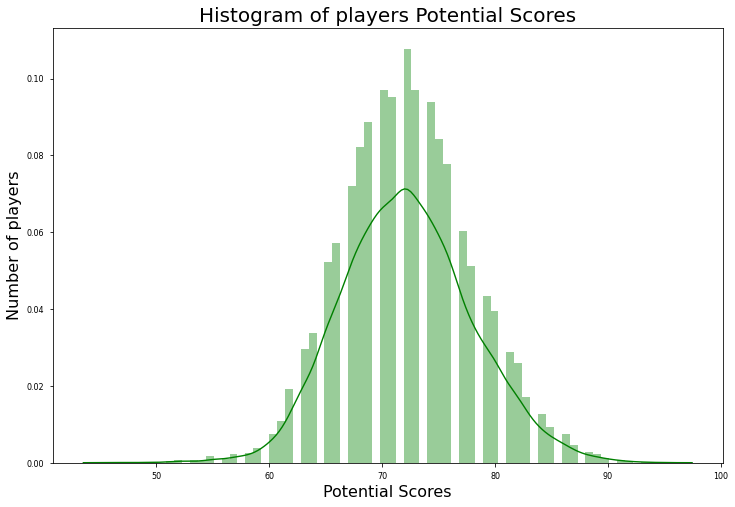

In [12]:
x = data.potential
plt.figure(figsize=(12,8))
plt.style.use('seaborn-paper')

ax = sns.distplot(x, bins = 70, kde = True, color = 'g')
ax.set_xlabel(xlabel = "Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)

### Comparing left-footed and right-footed footballers in skill-moves vs dribbing

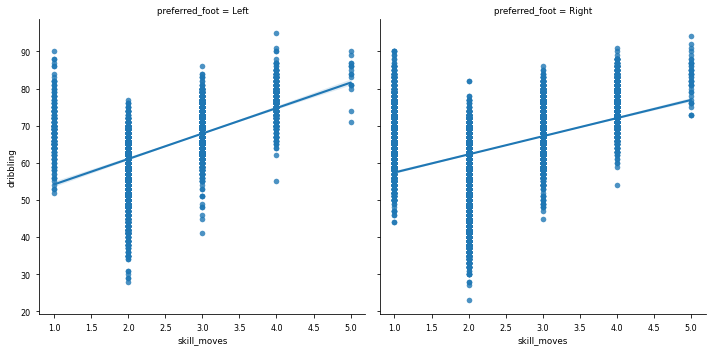

In [13]:
plt.rcParams['figure.figsize'] = (16, 8)
sns.lmplot(x = 'skill_moves', y = 'dribbling', data = data, col = 'preferred_foot')
plt.show()

### FIFA top 15 players 

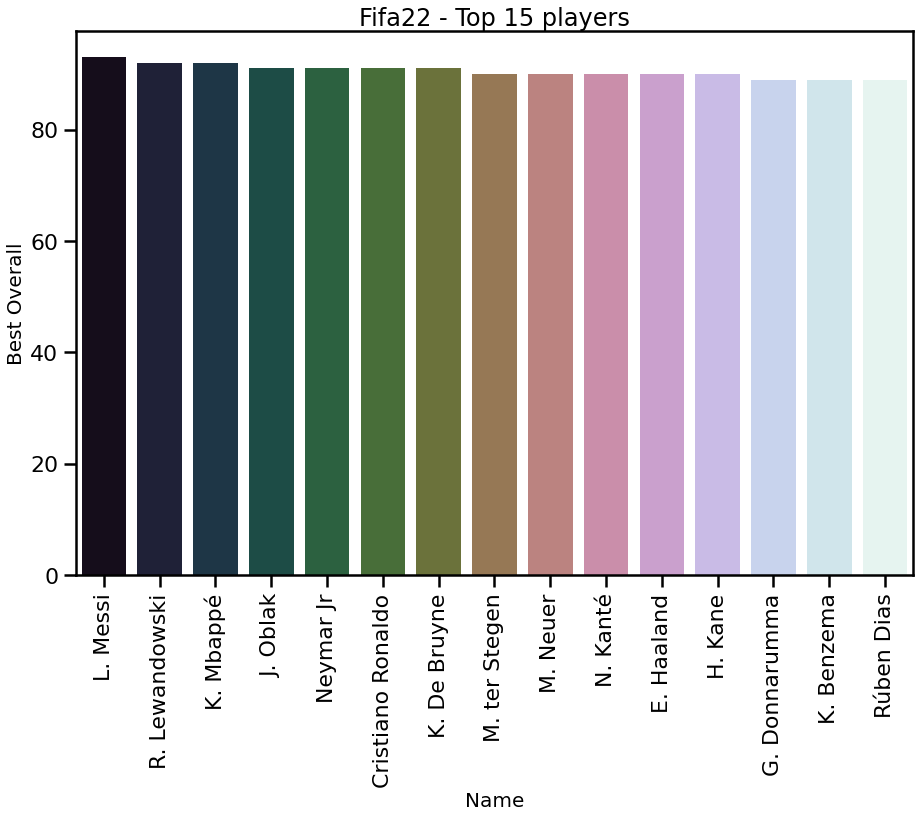

In [18]:
Overall = data['best_overall']
Name= data["name"]

# create dataframe(Name,Overall)
df = pd.DataFrame({'name': Name,'best_overall':Overall})
df = df.sort_values(by='best_overall', ascending=False)

x = df.name.head(15)  
y = df.best_overall.head(15)

# visualize
sns.set_context('poster')
plt.figure(figsize=(15,10))

ax= sns.barplot(x=x, y=y,palette='cubehelix')
plt.xticks(rotation= 90)
plt.xlabel('Name', size = 20) 
plt.ylabel('Best Overall', size = 20 )
plt.title('Fifa22 - Top 15 players') 
plt.show()

### The 15 most valuable FIFA players 

Text(0.5, 1.0, '2022 Most Valuable Player ')

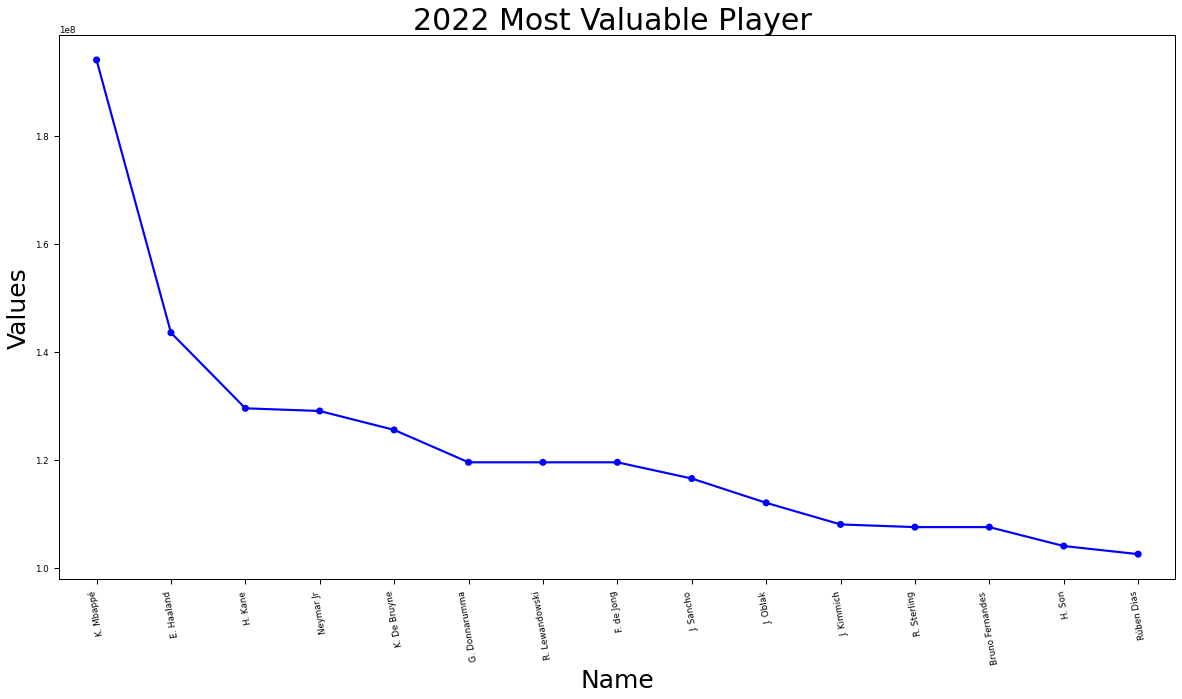

In [19]:
#most valuable player
sns.set_context('paper')
value = list(data.market_value) 
name = data.name
df = pd.DataFrame({ 'market_value' : value,'name':name})
df = df.sort_values(by='market_value', ascending=False)

x = df.name.head(15)
value_y = df.market_value.head(20)

# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x=x,y=value_y,color='blue',alpha=0.9) 
plt.xticks(rotation= 100) 
plt.xlabel('Name',fontsize = 25,color='black') 
plt.ylabel('Values',fontsize = 25,color='black') 
plt.title('2022 Most Valuable Player ',fontsize = 30,color='black') 

### Triangle Correlation Heatmap 

/var/folders/j3/g5fv9prd2c7fjyfw6zqshymc0000gn/T/ipykernel_20492/1703586145.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



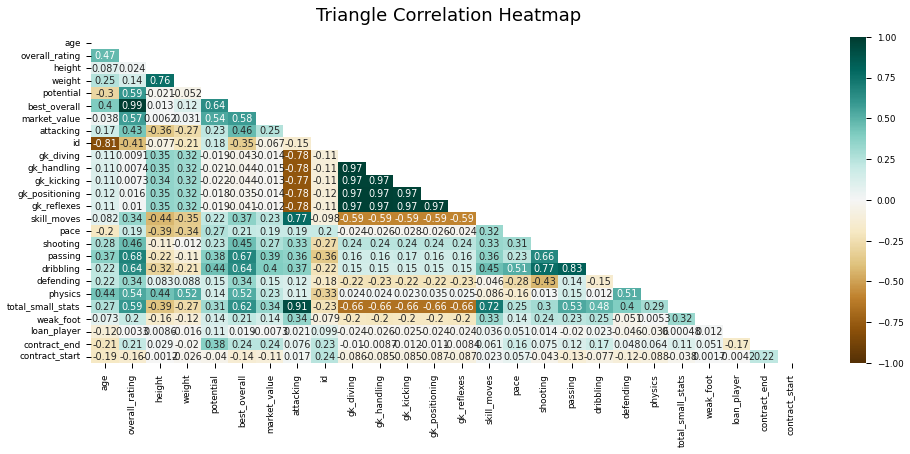

In [20]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

### Features Correlation with the target variable 

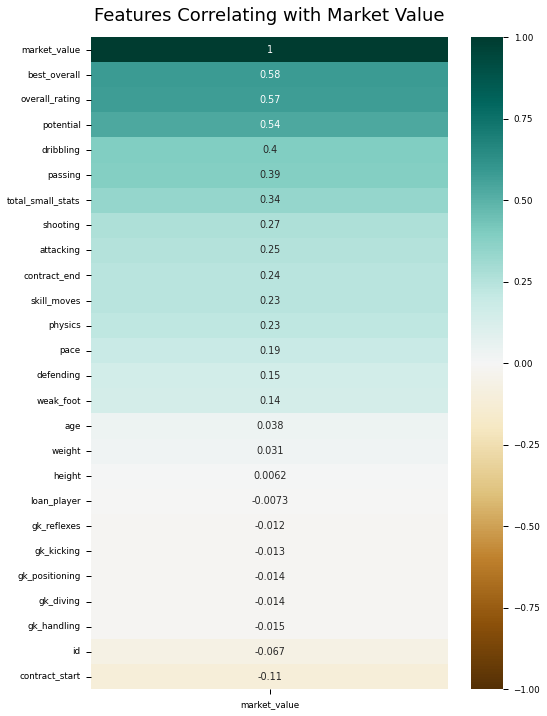

In [21]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['market_value']].sort_values(by='market_value', ascending=False), 
vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Market Value', fontdict={'fontsize':18}, pad=16);